# 미니 프로젝트 : 가위바위보 분류기를 만들자

모델 빌드 순서
1. 이미지를 로드합니다.
2. 이미지를 전처리합니다(리사이즈,픽셀별 정규화 등).
3. 모델을 빌드합니다.
4. 모델을 컴파일합니다(하이퍼파라미터 등 설정).
5. 모델을 훈련시킵니다.
6. 모델을 평가합니다(정확도 등).
7. 예측을 수행합니다.

## 라이브러리 버전을 확인해 봅니다
- tensorflow와 keras의 버전을 확인해 주세요.

In [37]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.13.0
1.23.5


## 데이터 불러오기 + Resize 하기
- 라이브러리 불러오기

In [38]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 가위, 바위, 보 이미지 각 1600장씩 모두 4800장의 데이터를 준비
- 가위, 바위, 보 이미지를 읽어들이고 사이즈를 변경합니다.

In [39]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 사이즈를 변경합니다.
image_dir_path = os.getenv("HOME") + "/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print(image_dir_path)
print("가위 이미지 resize 완료!")

1600  images to be resized.


/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_38508/1534809835.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1600  images resized.
/Users/ralphpark/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [40]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 사이즈를 변경합니다.
image_dir_path = os.getenv("HOME") + "/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/rock"
resize_images(image_dir_path)

1600  images to be resized.


/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_38508/1534809835.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1600  images resized.


In [41]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 사이즈를 변경합니다.
image_dir_path = os.getenv("HOME") + "/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/paper"
resize_images(image_dir_path)

1600  images to be resized.


/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_38508/1534809835.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1600  images resized.


## 가위, 바위, 보 데이터 로드 함수 구현
- 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

In [42]:
# 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수

import numpy as np
import matplotlib.pyplot as plt

def load_data(img_path, number_of_data=4800):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4800 입니다.
x_train shape: (4800, 28, 28, 3)
y_train shape: (4800,)


## 첫번째 이미지를 확인

라벨:  0


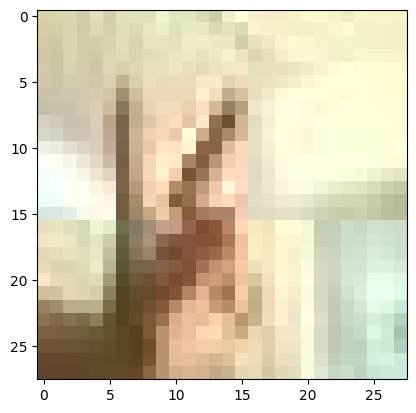

In [43]:
# 이미지 확인
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [44]:
# tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계

import tensorflow as tf
from tensorflow import keras

n_channel_1 = 48
n_channel_2 = 96
n_dense = 128
n_train_epoch = 50

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 48)        1344      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 96)        41568     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 96)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2400)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

 ## 테스트용 데이터 이미지 리사이즈

In [46]:

# test image resize

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
print(image_dir_path)
print("test - 가위 이미지 resize 완료!")
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
print(image_dir_path)
print("test - 가위 이미지 resize 완료!")
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
print(image_dir_path)
print("test - 가위 이미지 resize 완료!")


500  images to be resized.


/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_38508/1534809835.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


500  images resized.
/Users/ralphpark/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/test/scissor
test - 가위 이미지 resize 완료!
500  images to be resized.
500  images resized.
/Users/ralphpark/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/test/rock
test - 가위 이미지 resize 완료!
500  images to be resized.
500  images resized.
/Users/ralphpark/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/test/paper
test - 가위 이미지 resize 완료!


## 딥러닝 네트워크 학습시키기

In [47]:

# model을 학습시키는 코드를 직접 작성해 보세요.
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
150/150 [==============================] - 3s 17ms/step - loss: 0.5308 - accuracy: 0.7906
Epoch 2/10
150/150 [==============================] - 3s 17ms/step - loss: 0.0953 - accuracy: 0.9731
Epoch 3/10
150/150 [==============================] - 2s 16ms/step - loss: 0.0224 - accuracy: 0.9962
Epoch 4/10
150/150 [==============================] - 2s 16ms/step - loss: 0.0106 - accuracy: 0.9990
Epoch 5/10
150/150 [==============================] - 2s 16ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 6/10
150/150 [==============================] - 2s 17ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/10
150/150 [==============================] - 2s 16ms/step - loss: 9.7139e-04 - accuracy: 1.0000
Epoch 8/10
150/150 [==============================] - 3s 17ms/step - loss: 0.0061 - accuracy: 0.9985
Epoch 9/10
150/150 [==============================] - 3s 17ms/step - loss: 9.8252e-04 - accuracy: 1.0000
Epoch 10/10
150/150 [==============================] - 3s 17ms/step - loss: 3.0160e

## test data 로드

In [48]:
def load_test_data(img_path, number_of_data=1500):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("시험데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/PycharmProjects/aiffel5_quest/MainQuest03/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))
# 우리가 만든 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태를 가집니다. 이전 스텝에서 첫 번째 레이어에 input_shape=(28,28,1)로 지정했던 것을 기억하시나요?
# 그런데 print(x_train.shape) 을 해보면, (60000, 28, 28) 로 채널수에 대한 정보가 없습니다. 따라서 (60000, 28, 28, 1) 로 만들어 주어야 합니다 (여기서 채널수 1은 흑백 이미지를 의미합니다. 컬러 이미지라면 R, G, B 세 가지 값이 있기 때문에 3이겠죠?).

print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

시험데이터(x_test)의 이미지 개수는 1500 입니다.
x_test shape: (1500, 28, 28, 3)
y_test shape: (1500,)
Before Reshape - x_test_norm shape: (1500, 28, 28, 3)
After Reshape - x_test_reshaped shape: (1500, 28, 28, 3)


## test data로 모델 성능 평가

In [49]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

Epoch 1/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0093 - accuracy: 0.9967
Epoch 2/50
150/150 [==============================] - 3s 17ms/step - loss: 2.2684e-04 - accuracy: 1.0000
Epoch 3/50
150/150 [==============================] - 2s 16ms/step - loss: 1.1147e-04 - accuracy: 1.0000
Epoch 4/50
150/150 [==============================] - 2s 17ms/step - loss: 7.7416e-05 - accuracy: 1.0000
Epoch 5/50
150/150 [==============================] - 2s 16ms/step - loss: 5.8574e-05 - accuracy: 1.0000
Epoch 6/50
150/150 [==============================] - 3s 17ms/step - loss: 4.5371e-05 - accuracy: 1.0000
Epoch 7/50
150/150 [==============================] - 2s 16ms/step - loss: 3.6686e-05 - accuracy: 1.0000
Epoch 8/50
150/150 [==============================] - 2s 16ms/step - loss: 3.3411e-05 - accuracy: 1.0000
Epoch 9/50
150/150 [==============================] - 2s 17ms/step - loss: 2.5394e-05 - accuracy: 1.0000
Epoch 10/50
150/150 [==============================] - 2s 1

## 모델 성능 평가

In [50]:

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

47/47 - 1s - loss: 0.4808 - accuracy: 0.9173 - 619ms/epoch - 13ms/step
test_loss: 0.4808265268802643
test_accuracy: 0.9173333048820496


## 추론 결과와 실제 데이터 비교

47/47 [==============================] - 0s 9ms/step
model.predict() 결과 :  [0.9904694  0.00140158 0.00812913]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


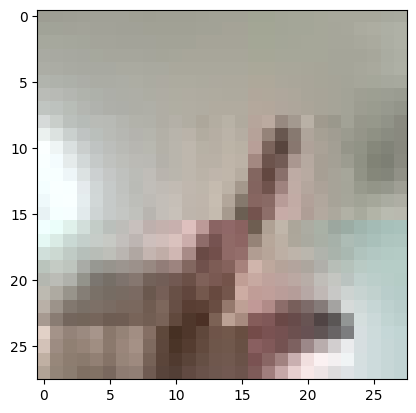

In [51]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

model.predict() 결과 :  [0.9904694  0.00140158 0.00812913]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


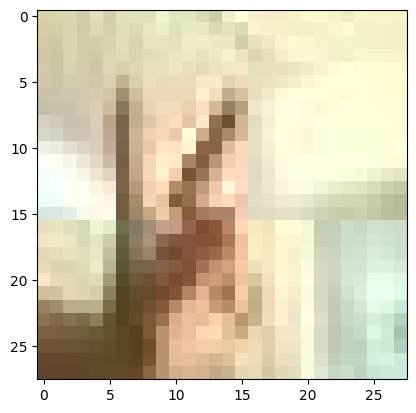

In [52]:
idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_train[idx])
plt.imshow(x_train[idx],cmap=plt.cm.binary)
plt.show()

## 잘못 예측한 값 확인

47/47 [==============================] - 1s 11ms/step
예측확률분포: [7.3500542e-04 9.9925995e-01 5.0856675e-06]
라벨: 2, 예측결과: 1


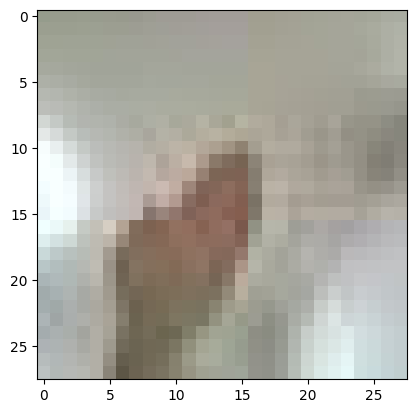

예측확률분포: [0.77751786 0.16879089 0.05369117]
라벨: 2, 예측결과: 0


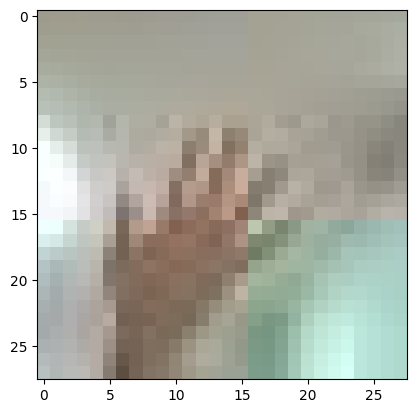

예측확률분포: [9.9862331e-01 1.3358437e-03 4.0868665e-05]
라벨: 2, 예측결과: 0


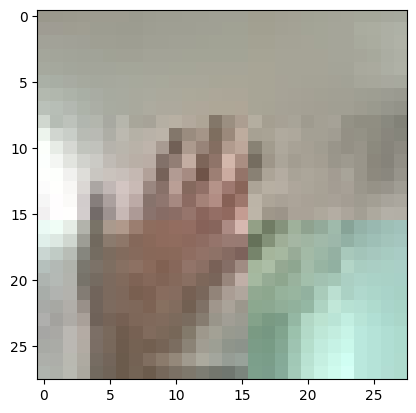

예측확률분포: [0.00392676 0.0010078  0.9950654 ]
라벨: 0, 예측결과: 2


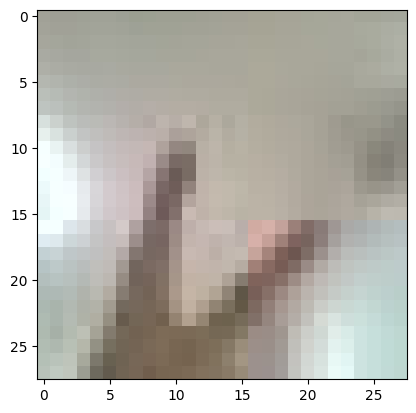

예측확률분포: [9.1463841e-09 9.9996907e-01 3.0886880e-05]
라벨: 2, 예측결과: 1


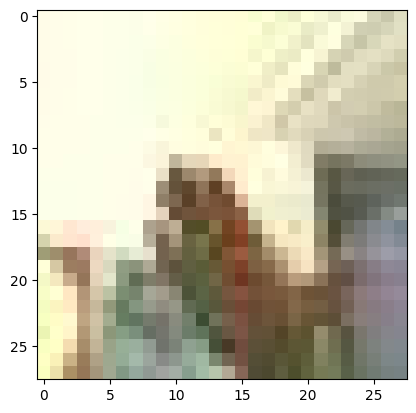

In [53]:
import random

predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [1]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

NameError: name 'np' is not defined

## 정리

이 코드는 rock, scissor, paper 게임 이미지를 분류하는 모델을 학습하고 성능을 평가하는 코드입니다.

1. resize_images: 이미지 사이즈를 28x28로 조정합니다.
2. load_data: 경로에서 rock, scissor, paper 이미지를 읽어 로드합니다. 읽은 이미지를 배열로 정리하여 반환합니다.
3. 모델 학습을 위해 이미지 데이터를 정규화합니다.
4. 모델 정의: 2개의 convolutional layer와 각각 max pooling layer, 2개의 fully connected layer로 정의됩니다.
5. load_test_data: 테스트 데이터를 나눠 읽어옵니다.
6. 모델 학습: 위에서 정의한 모델을 학습합니다.
7. 성능 평가: 학습한 모델의 성능을 테스트 데이터로 평가합니다.